## One-way ANOVA Testing for Time Completion on Task 1 (Urgent Task)

In [1]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sample_df_orig = pd.read_csv("data1.csv")

def extract_numerical(value):
    return float(value.split()[0])
    
sample_df = sample_df_orig.apply(lambda x: x.map(extract_numerical))

sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Default List     42 non-null     float64
 1   Default Card     42 non-null     float64
 2   Redesigned List  42 non-null     float64
 3   Redesigned Card  42 non-null     float64
 4   Carousel         42 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


In [3]:
sample_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,28963.785714,18664.285714,5463.380952,7699.309524,6180.523810
std,40452.139277,32017.060507,4182.310401,8481.554297,4241.104724
min,1247.000000,1357.000000,1297.000000,1823.000000,760.000000
25%,8342.500000,6590.000000,2860.750000,3044.250000,3178.500000
50%,16230.500000,9117.500000,4495.000000,5786.500000,5157.000000
75%,25476.250000,15707.000000,6618.250000,9628.750000,7735.750000
max,201185.000000,195647.000000,21895.000000,54599.000000,18039.000000


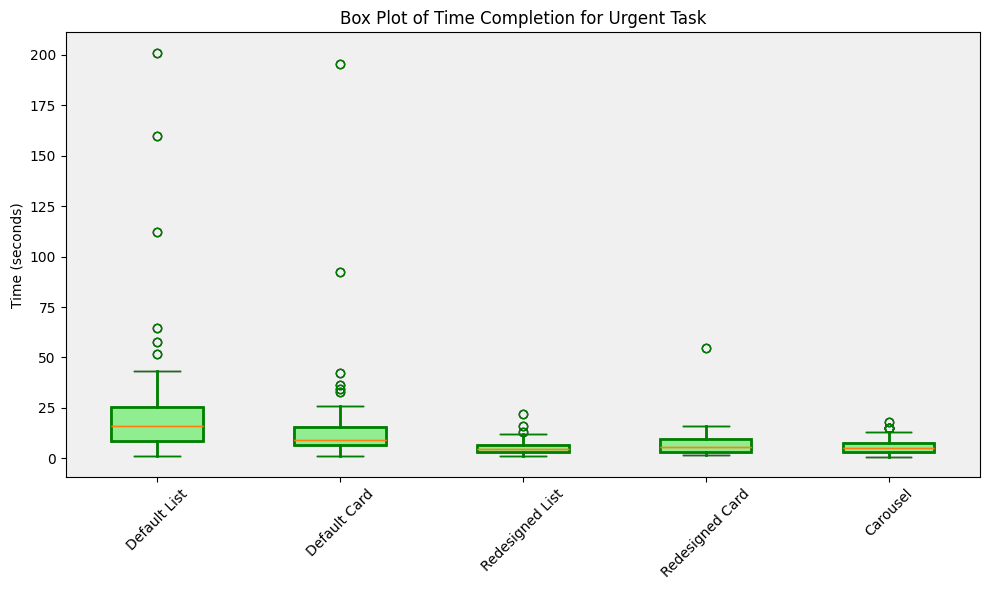

In [4]:
sample_df_seconds = sample_df / 1000 

plt.figure(figsize=(10, 6))


data_to_plot = [sample_df_seconds[col].dropna() for col in sample_df_seconds.columns]


boxplot = plt.boxplot(data_to_plot, patch_artist=True)


boxplot = plt.boxplot(data_to_plot, patch_artist=True,
                     boxprops=dict(color='green', linewidth=2),
                     whiskerprops=dict(color='green', linewidth=2),
                     flierprops=dict(color='green', markeredgecolor='green'),
                     capprops=dict(color='green'))

# Set the face color of each box to pastel green
for patch in boxplot['boxes']:
    patch.set_facecolor('lightgreen')

plt.title('Box Plot of Time Completion for Urgent Task')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(1, len(sample_df_seconds.columns) + 1), sample_df_seconds.columns, rotation=45)

plt.gca().set_facecolor('#F0F0F0')


plt.tight_layout()
plt.show()

In [5]:
#Get the mean first


means = sample_df.mean()

print("Mean of each column:")
print(means)

Mean of each column:
Default List       28963.785714
Default Card       18664.285714
Redesigned List     5463.380952
Redesigned Card     7699.309524
Carousel            6180.523810
dtype: float64


In [6]:
#Get significant difference using One-way ANOVA
df = sample_df
f_statistic, p_value = f_oneway(df['Default List'], df['Default Card'], df['Redesigned List'], df['Redesigned Card'], df['Carousel'])

# Print results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 7.917095000695259
P-value: 5.9315659027920345e-06


In [7]:
if p_value < 0.05:
    print("There is a significant difference in the time users take to complete the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.")
else:
    print("There is a significant difference in the time users take to complete the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.")

There is a significant difference in the time users take to complete the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.


In [8]:
tukey_results = pairwise_tukeyhsd(sample_df.stack(), sample_df.stack().index.get_level_values(1))

# Print the results
print(tukey_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
     group1          group2       meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------------------------
       Carousel    Default Card  12483.7619 0.1112  -1649.3989 26616.9228  False
       Carousel    Default List  22783.2619 0.0001   8650.1011 36916.4228   True
       Carousel Redesigned Card   1518.7857 0.9983 -12614.3751 15651.9466  False
       Carousel Redesigned List   -717.1429 0.9999 -14850.3037  13416.018  False
   Default Card    Default List     10299.5  0.267  -3833.6609 24432.6609  False
   Default Card Redesigned Card -10964.9762 0.2092  -25098.137  3168.1847  False
   Default Card Redesigned List -13200.9048 0.0797 -27334.0656   932.2561  False
   Default List Redesigned Card -21264.4762 0.0005  -35397.637 -7131.3153   True
   Default List Redesigned List -23500.4048 0.0001 -37633.5656 -9367.2439   True
Redesigned Card Redesigned L

In [9]:
descriptive_stats = sample_df.describe()

tukey_data = sample_df.melt(var_name='group', value_name='value')

# Perform Tukey's test
mc = MultiComparison(tukey_data['value'], tukey_data['group'])
tukey_result = mc.tukeyhsd()

# Extract significant results
tukey_summary = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
significant_results = tukey_summary[tukey_summary['reject']]

# Determine the fastest and slowest completion time
fastest_completion_time = descriptive_stats.loc['mean'].idxmin()
slowest_completion_time = descriptive_stats.loc['mean'].idxmax()

print("Descriptive Statistics:")
print(descriptive_stats)
print("\nTukey's Test Results (Significant Comparisons Only):")
print(significant_results)
print("\nConfiguration with the fastest completion time:", fastest_completion_time)
print("\nConfiguration with the slowest completion time:", slowest_completion_time)

Descriptive Statistics:
        Default List   Default Card  Redesigned List  Redesigned Card  \
count      42.000000      42.000000        42.000000        42.000000   
mean    28963.785714   18664.285714      5463.380952      7699.309524   
std     40452.139277   32017.060507      4182.310401      8481.554297   
min      1247.000000    1357.000000      1297.000000      1823.000000   
25%      8342.500000    6590.000000      2860.750000      3044.250000   
50%     16230.500000    9117.500000      4495.000000      5786.500000   
75%     25476.250000   15707.000000      6618.250000      9628.750000   
max    201185.000000  195647.000000     21895.000000     54599.000000   

           Carousel  
count     42.000000  
mean    6180.523810  
std     4241.104724  
min      760.000000  
25%     3178.500000  
50%     5157.000000  
75%     7735.750000  
max    18039.000000  

Tukey's Test Results (Significant Comparisons Only):
         group1           group2    meandiff   p-adj       lower  

## One-way ANOVA Testing for Time Completion on Task 2 (Announcement Task)

In [10]:
import pandas as pd
from scipy.stats import f_oneway

In [11]:
sample2_df_orig = pd.read_csv("data2.csv")

def extract_numerical(value):
    return float(value.split()[0])
    
sample2_df = sample2_df_orig.apply(lambda x: x.map(extract_numerical))

sample2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Default List     42 non-null     float64
 1   Default Card     42 non-null     float64
 2   Redesigned List  42 non-null     float64
 3   Redesigned Card  42 non-null     float64
 4   Carousel         42 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


In [12]:
sample2_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,20010.857143,9298.095238,4414.333333,8416.571429,4469.190476
std,19074.576186,6465.349072,4195.183078,6802.728151,4494.725843
min,4553.000000,2679.000000,878.000000,1141.000000,763.000000
25%,9524.500000,4962.000000,2079.750000,3627.500000,1690.750000
50%,13002.500000,7634.500000,2692.500000,7468.000000,3016.500000
75%,16669.500000,10798.250000,5180.750000,10328.000000,5265.250000
max,86041.000000,37695.000000,21264.000000,34083.000000,23749.000000


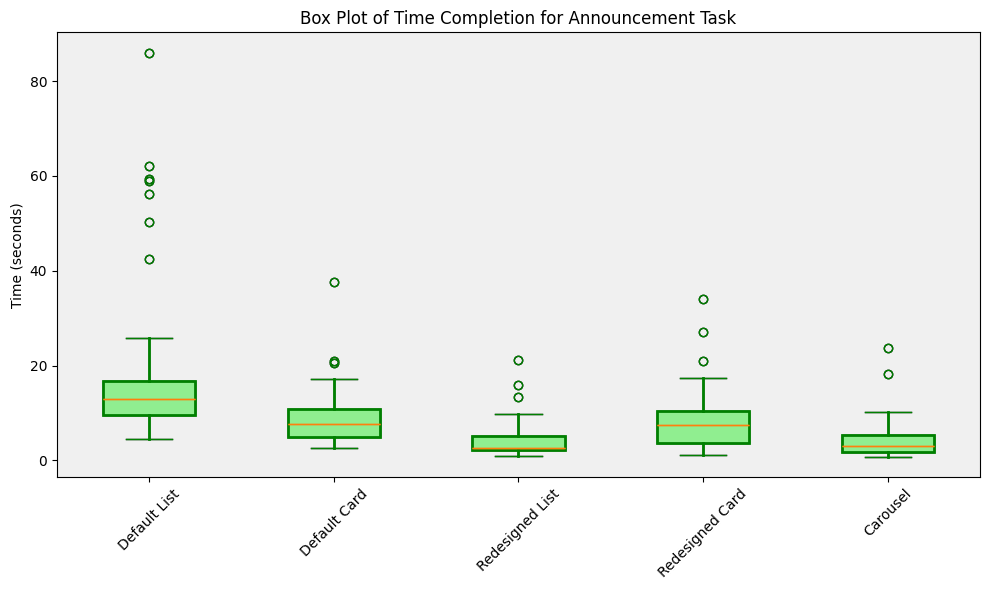

In [13]:
sample2_df_seconds = sample2_df / 1000 

plt.figure(figsize=(10, 6))


data_to_plot = [sample2_df_seconds[col].dropna() for col in sample2_df_seconds.columns]


boxplot = plt.boxplot(data_to_plot, patch_artist=True)


boxplot = plt.boxplot(data_to_plot, patch_artist=True,
                     boxprops=dict(color='green', linewidth=2),
                     whiskerprops=dict(color='green', linewidth=2),
                     flierprops=dict(color='green', markeredgecolor='green'),
                     capprops=dict(color='green'))

# Set the face color of each box to pastel green
for patch in boxplot['boxes']:
    patch.set_facecolor('lightgreen')

plt.title('Box Plot of Time Completion for Announcement Task')
plt.ylabel('Time (seconds)')
plt.xticks(np.arange(1, len(sample2_df_seconds.columns) + 1), sample_df_seconds.columns, rotation=45)

plt.gca().set_facecolor('#F0F0F0')


plt.tight_layout()
plt.show()

In [14]:
#Get the mean first


means = sample2_df.mean()

print("Mean of each column:")
print(means)

Mean of each column:
Default List       20010.857143
Default Card        9298.095238
Redesigned List     4414.333333
Redesigned Card     8416.571429
Carousel            4469.190476
dtype: float64


In [15]:
#Get significant difference using One-way ANOVA
df = sample2_df
f_statistic, p_value = f_oneway(df['Default List'], df['Default Card'], df['Redesigned List'], df['Redesigned Card'], df['Carousel'])

# Print results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 17.442879708577834
P-value: 2.465890933317309e-12


In [16]:
if p_value < 0.05:
    print("There is a significant difference in the time users take to complete the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.")
else:
    print("There is no significant difference in the time users take to complete the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.")

There is a significant difference in the time users take to complete the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.


In [17]:
tukey_results = pairwise_tukeyhsd(sample2_df.stack(), sample_df.stack().index.get_level_values(1))

# Print the results
print(tukey_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
     group1          group2       meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------------------------
       Carousel    Default Card   4828.9048 0.1707  -1114.8468 10772.6564  False
       Carousel    Default List  15541.6667    0.0   9597.9151 21485.4183   True
       Carousel Redesigned Card    3947.381 0.3604  -1996.3706  9891.1325  False
       Carousel Redesigned List    -54.8571    1.0  -5998.6087  5888.8945  False
   Default Card    Default List  10712.7619    0.0   4769.0103 16656.5135   True
   Default Card Redesigned Card   -881.5238 0.9941  -6825.2754  5062.2278  False
   Default Card Redesigned List  -4883.7619 0.1619 -10827.5135  1059.9897  False
   Default List Redesigned Card -11594.2857    0.0 -17538.0373 -5650.5341   True
   Default List Redesigned List -15596.5238    0.0 -21540.2754 -9652.7722   True
Redesigned Card Redesigned L

In [18]:
descriptive_stats = sample2_df.describe()

tukey_data = sample2_df.melt(var_name='group', value_name='value')

# Perform Tukey's test
mc = MultiComparison(tukey_data['value'], tukey_data['group'])
tukey_result = mc.tukeyhsd()

# Extract significant results
tukey_summary = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
significant_results = tukey_summary[tukey_summary['reject']]

# Determine the fastest and slowest completion time
fastest_completion_time = descriptive_stats.loc['mean'].idxmin()
slowest_completion_time = descriptive_stats.loc['mean'].idxmax()

print("Descriptive Statistics:")
print(descriptive_stats)
print("\nTukey's Test Results (Significant Comparisons Only):")
print(significant_results)
print("\nConfiguration with the fastest completion time:", fastest_completion_time)
print("\nConfiguration with the slowest completion time:", slowest_completion_time)


Descriptive Statistics:
       Default List  Default Card  Redesigned List  Redesigned Card  \
count     42.000000     42.000000        42.000000        42.000000   
mean   20010.857143   9298.095238      4414.333333      8416.571429   
std    19074.576186   6465.349072      4195.183078      6802.728151   
min     4553.000000   2679.000000       878.000000      1141.000000   
25%     9524.500000   4962.000000      2079.750000      3627.500000   
50%    13002.500000   7634.500000      2692.500000      7468.000000   
75%    16669.500000  10798.250000      5180.750000     10328.000000   
max    86041.000000  37695.000000     21264.000000     34083.000000   

           Carousel  
count     42.000000  
mean    4469.190476  
std     4494.725843  
min      763.000000  
25%     1690.750000  
50%     3016.500000  
75%     5265.250000  
max    23749.000000  

Tukey's Test Results (Significant Comparisons Only):
         group1           group2    meandiff  p-adj       lower       upper  \
1    

## One-way ANOVA Testing for Idenitifaction Accuracy on Task 1 (Urgent Task)

In [19]:
sample3_df_orig = pd.read_csv("data3.csv")

def extract_numerical(value):
    return float(value.split()[0])
    
sample3_df = sample3_df_orig

sample3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Default List     42 non-null     float64
 1   Default Card     42 non-null     float64
 2   Redesigned List  42 non-null     float64
 3   Redesigned Card  42 non-null     float64
 4   Carousel         42 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


In [20]:
sample3_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.483897,0.625286,0.857143,0.872487,0.948413
std,0.406790,0.353639,0.263707,0.275136,0.162501
min,0.012987,0.055556,0.250000,0.027778,0.333333
25%,0.114583,0.333333,1.000000,1.000000,1.000000
50%,0.333333,0.500000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


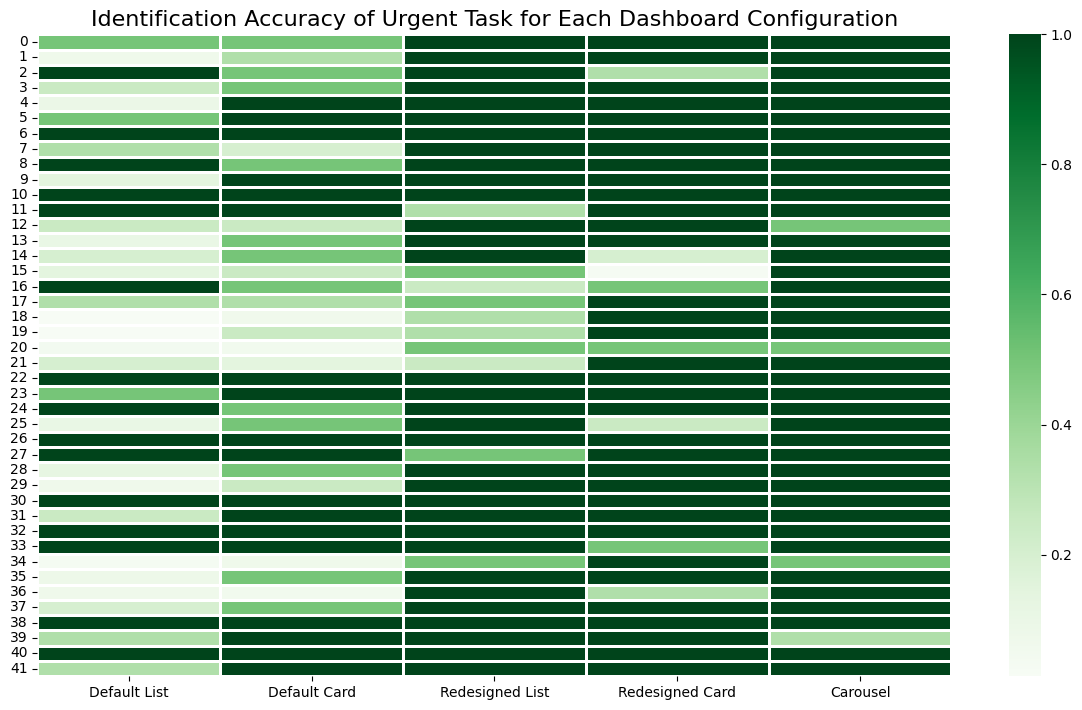

In [21]:
plt.figure(figsize=(12, 8))  
sns.heatmap(sample3_df, cmap='Greens', annot=False, fmt=".2f", linewidths=2, linecolor='white')

plt.title('Identification Accuracy of Urgent Task for Each Dashboard Configuration', fontsize=16)  

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  

plt.show()


In [22]:
#Get the mean first


means = sample3_df.mean()

print("Mean of each column:")
print(means)

Mean of each column:
Default List       0.483897
Default Card       0.625286
Redesigned List    0.857143
Redesigned Card    0.872487
Carousel           0.948413
dtype: float64


In [23]:
#Get significant difference using One-way ANOVA
df = sample3_df
f_statistic, p_value = f_oneway(df['Default List'], df['Default Card'], df['Redesigned List'], df['Redesigned Card'], df['Carousel'])

# Print results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 17.2586617326642
P-value: 3.222526390837907e-12


In [24]:
if p_value < 0.05:
    print("There is a significant difference in the identification accuracy when completing the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.")
else:
    print("There is no significant difference in the identification accuracy when completing the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.")

There is a significant difference in the identification accuracy when completing the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.


In [25]:
# Perform Tukey's post hoc test
tukey_results = pairwise_tukeyhsd(sample3_df.stack(), sample3_df.stack().index.get_level_values(1))

# Print the Tukey's test results
print("Tukey's Test Results:")
print(tukey_results)

Tukey's Test Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
       Carousel    Default Card  -0.3231    0.0 -0.5057 -0.1405   True
       Carousel    Default List  -0.4645    0.0 -0.6471 -0.2819   True
       Carousel Redesigned Card  -0.0759 0.7827 -0.2585  0.1067  False
       Carousel Redesigned List  -0.0913 0.6439 -0.2739  0.0913  False
   Default Card    Default List  -0.1414  0.211  -0.324  0.0412  False
   Default Card Redesigned Card   0.2472 0.0023  0.0646  0.4298   True
   Default Card Redesigned List   0.2319 0.0052  0.0493  0.4145   True
   Default List Redesigned Card   0.3886    0.0   0.206  0.5712   True
   Default List Redesigned List   0.3732    0.0  0.1906  0.5558   True
Redesigned Card Redesigned List  -0.0153 0.9994 -0.1979  0.1673  False
-------------------------------------------------------

In [26]:
descriptive_stats = sample3_df.describe()

tukey_data = sample3_df.melt(var_name='group', value_name='accuracy')

# Perform Tukey's test
mc = MultiComparison(tukey_data['accuracy'], tukey_data['group'])
tukey_result = mc.tukeyhsd()

# Extract significant results
tukey_summary = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
significant_results = tukey_summary[tukey_summary['reject']]

# Determine the configuration with the best and worst identification accuracy
best_accuracy_configuration = descriptive_stats.loc['mean'].idxmax()
worst_accuracy_configuration = descriptive_stats.loc['mean'].idxmin()

print("Descriptive Statistics:")
print(descriptive_stats)
print("\nTukey's Test Results (Significant Comparisons Only):")
print(significant_results)
print("\nConfiguration with the best identification accuracy:", best_accuracy_configuration)
print("Configuration with the worst identification accuracy:", worst_accuracy_configuration)

Descriptive Statistics:
       Default List  Default Card  Redesigned List  Redesigned Card   Carousel
count     42.000000     42.000000        42.000000        42.000000  42.000000
mean       0.483897      0.625286         0.857143         0.872487   0.948413
std        0.406790      0.353639         0.263707         0.275136   0.162501
min        0.012987      0.055556         0.250000         0.027778   0.333333
25%        0.114583      0.333333         1.000000         1.000000   1.000000
50%        0.333333      0.500000         1.000000         1.000000   1.000000
75%        1.000000      1.000000         1.000000         1.000000   1.000000
max        1.000000      1.000000         1.000000         1.000000   1.000000

Tukey's Test Results (Significant Comparisons Only):
         group1           group2  meandiff   p-adj   lower   upper  reject
0      Carousel     Default Card   -0.3231  0.0000 -0.5057 -0.1405    True
1      Carousel     Default List   -0.4645  0.0000 -0.6471 -0

## One-way ANOVA Testing for Idenitifaction Accuracy on Task 2 (Announcement Task)

In [27]:
sample4_df_orig = pd.read_csv("data4.csv")

def extract_numerical(value):
    return float(value.split()[0])
    
sample4_df = sample4_df_orig

sample4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Default List     42 non-null     float64
 1   Default Card     42 non-null     float64
 2   Redesigned List  42 non-null     float64
 3   Redesigned Card  42 non-null     float64
 4   Carousel         42 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


In [28]:
sample4_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.503618,0.647336,0.923413,0.706444,0.928571
std,0.392307,0.342635,0.215304,0.359602,0.198718
min,0.035714,0.071429,0.200000,0.100000,0.333333
25%,0.142857,0.333333,1.000000,0.375000,1.000000
50%,0.333333,0.500000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


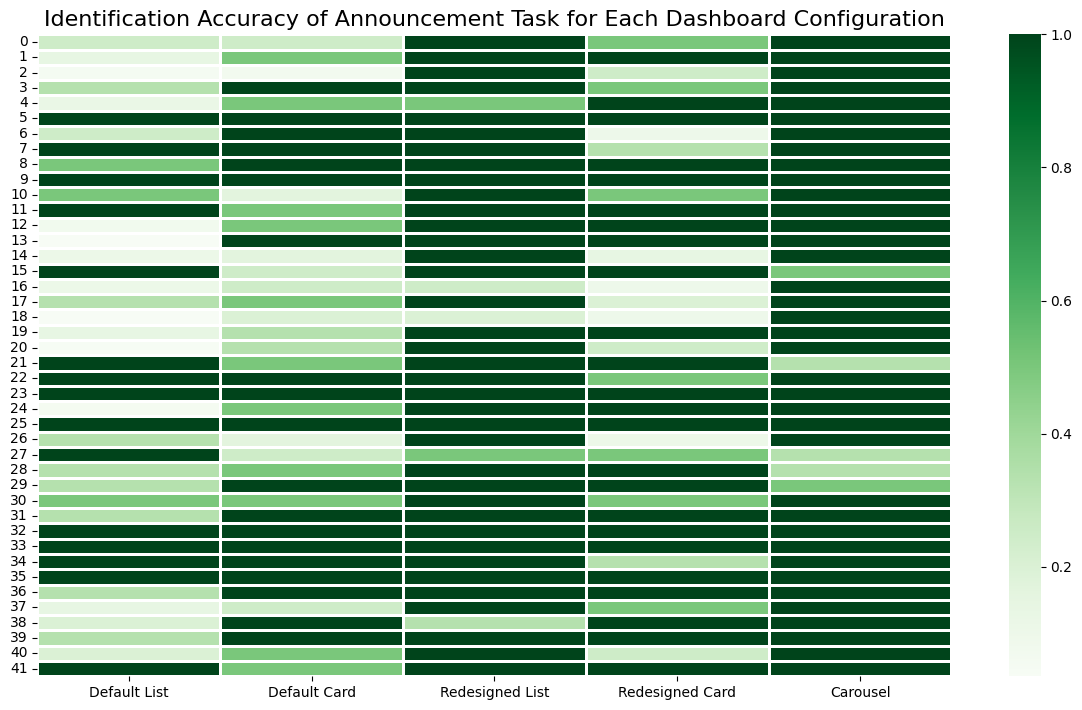

In [29]:
plt.figure(figsize=(12, 8))  
sns.heatmap(sample4_df, cmap='Greens', annot=False, fmt=".2f", linewidths=2, linecolor='white')

plt.title('Identification Accuracy of Announcement Task for Each Dashboard Configuration', fontsize=16)  

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  

plt.show()


In [30]:
#Get the mean first


means = sample4_df.mean()

print("Mean of each column:")
print(means)

Mean of each column:
Default List       0.503618
Default Card       0.647336
Redesigned List    0.923413
Redesigned Card    0.706444
Carousel           0.928571
dtype: float64


In [31]:
#Get significant difference using One-way ANOVA
df = sample4_df
f_statistic, p_value = f_oneway(df['Default List'], df['Default Card'], df['Redesigned List'], df['Redesigned Card'], df['Carousel'])

# Print results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 14.54477823683642
P-value: 1.790587588299984e-10


In [32]:
if p_value < 0.05:
    print("There is a significant difference in the identification accuracy when completing the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.")
else:
    print("There is no significant difference in the identification accuracy when completing the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.")

There is a significant difference in the identification accuracy when completing the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.


In [33]:
# Perform Tukey's post hoc test
tukey_results = pairwise_tukeyhsd(sample4_df.stack(), sample3_df.stack().index.get_level_values(1))

# Print the Tukey's test results
print("Tukey's Test Results:")
print(tukey_results)

Tukey's Test Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
       Carousel    Default Card  -0.2812 0.0005 -0.4686 -0.0939   True
       Carousel    Default List   -0.425    0.0 -0.6123 -0.2376   True
       Carousel Redesigned Card  -0.2221 0.0112 -0.4095 -0.0348   True
       Carousel Redesigned List  -0.0052    1.0 -0.1925  0.1822  False
   Default Card    Default List  -0.1437 0.2192  -0.331  0.0436  False
   Default Card Redesigned Card   0.0591 0.9081 -0.1282  0.2464  False
   Default Card Redesigned List   0.2761 0.0007  0.0887  0.4634   True
   Default List Redesigned Card   0.2028 0.0265  0.0155  0.3902   True
   Default List Redesigned List   0.4198    0.0  0.2325  0.6071   True
Redesigned Card Redesigned List    0.217 0.0142  0.0296  0.4043   True
-------------------------------------------------------

In [34]:
descriptive_stats = sample4_df.describe()

tukey_data = sample4_df.melt(var_name='group', value_name='accuracy')

# Perform Tukey's test
mc = MultiComparison(tukey_data['accuracy'], tukey_data['group'])
tukey_result = mc.tukeyhsd()

# Extract significant results
tukey_summary = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
significant_results = tukey_summary[tukey_summary['reject']]

# Determine the configuration with the best and worst identification accuracy
best_accuracy_configuration = descriptive_stats.loc['mean'].idxmax()
worst_accuracy_configuration = descriptive_stats.loc['mean'].idxmin()

print("Descriptive Statistics:")
print(descriptive_stats)
print("\nTukey's Test Results (Significant Comparisons Only):")
print(significant_results)
print("\nConfiguration with the best identification accuracy:", best_accuracy_configuration)
print("Configuration with the worst identification accuracy:", worst_accuracy_configuration)

Descriptive Statistics:
       Default List  Default Card  Redesigned List  Redesigned Card   Carousel
count     42.000000     42.000000        42.000000        42.000000  42.000000
mean       0.503618      0.647336         0.923413         0.706444   0.928571
std        0.392307      0.342635         0.215304         0.359602   0.198718
min        0.035714      0.071429         0.200000         0.100000   0.333333
25%        0.142857      0.333333         1.000000         0.375000   1.000000
50%        0.333333      0.500000         1.000000         1.000000   1.000000
75%        1.000000      1.000000         1.000000         1.000000   1.000000
max        1.000000      1.000000         1.000000         1.000000   1.000000

Tukey's Test Results (Significant Comparisons Only):
            group1           group2  meandiff   p-adj   lower   upper  reject
0         Carousel     Default Card   -0.2812  0.0005 -0.4686 -0.0939    True
1         Carousel     Default List   -0.4250  0.0000 -